# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Mohammad Kalbasi
2.   Student Number: 401211028


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [ ]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

In [ ]:
# showing two datasets 
plays.head()
plays

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [ ]:
artists.head()
artists

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte
...,...,...
17627,18741,Diamanda Galás
17628,18742,Aya RL
17629,18743,Coptic Rain
17630,18744,Oz Alchemist


# Preprocessing (20 pts)

In [ ]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = pd.merge(artists,plays,how='left',left_on=['id'], right_on=['artistID'])
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [ ]:
# our ground truth for checking result
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [ ]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})
ap

,id,name,userID,artistID,playCount
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [ ]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
# we apply our changes to new dataframe called ap_modified because we need original dataframe in f
ap_modified = ap.copy()
ap_modified.drop(['id'],axis = 1, inplace=True)
ap_modified.reset_index()
ap_modified

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [ ]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


artist_rank = ap[['name','userID','playCount']].copy()
artist_rank['userID'] = 1

aggregation_functions = {'userID': 'sum', 'playCount': 'sum'}
artist_rank = artist_rank.groupby(artist_rank['name']).aggregate(aggregation_functions)
artist_rank = artist_rank.rename(columns={"userID": "totalUniqueUsers","playCount":"totalArtistPlays"})
artist_rank = artist_rank.sort_values('totalArtistPlays',ascending=False)
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays']/artist_rank['totalUniqueUsers']
# our created result
artist_rank


,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [ ]:
# ground truth for testing our answere:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [ ]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################



ap = pd.merge(ap,artist_rank,how='left',left_on=['name'], right_on=['name'])
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,1,MALICE MIZER,34,1,212,3,771,257.000000
1,1,MALICE MIZER,274,1,483,3,771,257.000000
2,1,MALICE MIZER,785,1,76,3,771,257.000000
3,2,Diary of Dreams,135,2,1021,12,8012,667.666667
4,2,Diary of Dreams,257,2,152,12,8012,667.666667
5,2,Diary of Dreams,325,2,3466,12,8012,667.666667
6,2,Diary of Dreams,397,2,56,12,8012,667.666667
7,2,Diary of Dreams,560,2,134,12,8012,667.666667
8,2,Diary of Dreams,580,2,803,12,8012,667.666667
9,2,Diary of Dreams,935,2,428,12,8012,667.666667


In [ ]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [ ]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


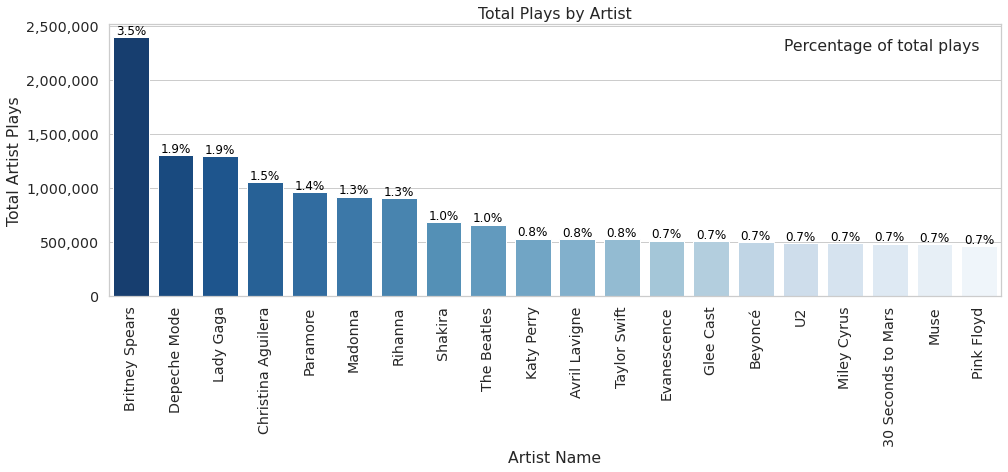

In [ ]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


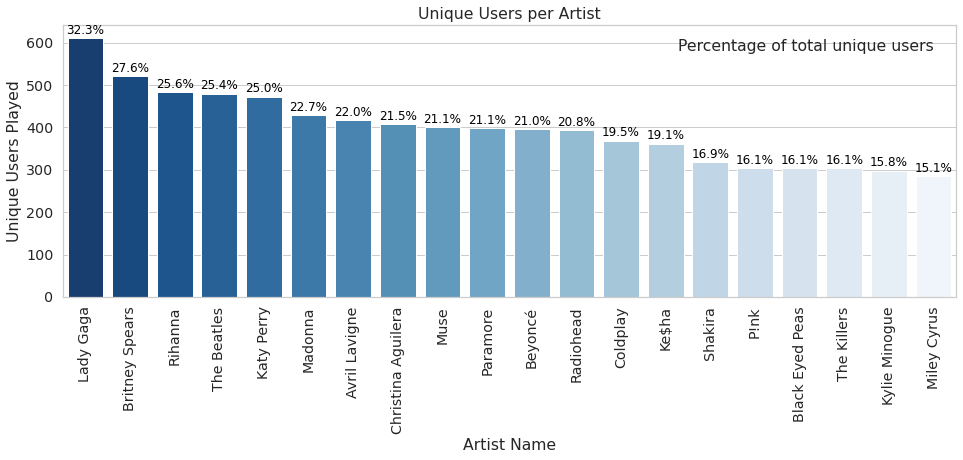

In [ ]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


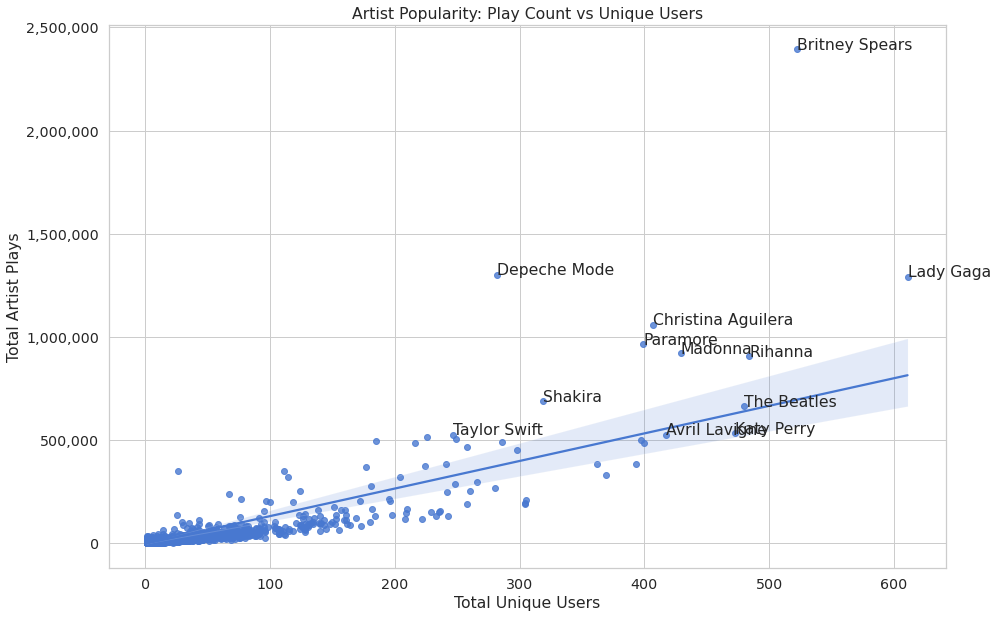

In [ ]:
top_artists = artist_rank.index[0:12] # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"
# we know that artist_rank is already sorted based on totalArtistPlays

x = artist_rank.totalUniqueUsers # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank.totalArtistPlays # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [ ]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [ ]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################
ap_temp = ap[['userID','artistID','playCountScaled']].copy()
ratings_df = ap_temp.pivot(index='userID',columns='artistID',values='playCountScaled')
# our output result
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#ground truth result
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings =ratings_df.fillna(0).to_numpy()
ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
tr = np.sum(ratings > 0,axis = 1) # we need this for next part so we can find how many people have rated mora than "MIN_USER_RATINGS" so we choose them
m,n = np.shape(ratings)
sparse_rate = np.sum(tr)/(m*n)
print(f'rate of sparsity of matrix = {sparse_rate}')
## END

rate of sparsity of matrix = 0.002763750225421394


# Fitting(Training) Model (50pts)

In [ ]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    number_train_val = np.sum(tr>= MIN_USER_RATINGS)
    index_chosen = np.asarray(np.where(tr>= MIN_USER_RATINGS)).squeeze()
    n,m = np.shape(ratings)
    train = ratings.copy()
    validation = np.zeros((n,m))
    for i in range(n):
      index_non_zero = np.asarray(np.where(ratings[i,:] > 0)).squeeze()
      non_zero_counter = np.count_nonzero(ratings[i,:])
      if (non_zero_counter >= MIN_USER_RATINGS):
        np.random.shuffle(index_non_zero)
        train[i,index_non_zero[0:DELETE_RATING_COUNT]] = 0
        validation[i,index_non_zero[0:DELETE_RATING_COUNT]] = ratings[i,index_non_zero[0:DELETE_RATING_COUNT]]
    return train, validation

In [ ]:
train, val = train_test_split(ratings)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True]])

In [ ]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = np.asarray(prediction[ground_truth!=0]).reshape(-1)
    ground_truth = np.asarray(ground_truth[ground_truth!=0]).reshape(-1)
    
    
    return sqrt(mean_squared_error(prediction, ground_truth))

In [ ]:
from tqdm import tqdm # added this just for visualization when we train model
class Recommender:
  # P is matrix representin artists and Q represent user, s
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    # P is matrix that represents artists and Q represent users, so here we create rating matrix by multiplying (Q^T)*P
    predicted = np.matmul(Q.T,P)
    return predicted
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #initilization of Q and P
    m,n = np.shape(X_train)
    
    Q = np.random.normal(0.0, 0.1, size=(self.n_latent_features, m))
    P = np.random.normal(0.0, 0.1, size=(self.n_latent_features, n))
    #TODO : save the loss on train and validation data in each iteration
    train_loss = []
    valid_loss = []
    [row_train,col_train] = np.where(X_train>0)
    iter_epcoh_num = len(row_train)
    for epoch_num in tqdm(range(self.n_epochs)):
      counter = 0
      for counter_indicator in range(iter_epcoh_num):
        i = row_train[counter_indicator]
        j = col_train[counter_indicator]
        counter = counter + 1
        
        
        e_ui = X_train[i,j] - np.matmul(Q[:,i].T,P[:,j])
        Q[:,i] = Q[:,i] + self.learning_rate*(e_ui*P[:,j] - self.lmbda*Q[:,i])
        P[:,j] = P[:,j] + self.learning_rate*(e_ui*Q[:,i] - self.lmbda*P[:,j])
      #print(f"epoch {epoch_num+1} done!")
      train_loss_iter = rmse(self.predictions(P,Q),X_train)
      train_loss.append(train_loss_iter)
      valid_loss_iter = rmse(self.predictions(P,Q),X_val)
      valid_loss.append(valid_loss_iter)
      
    
    self.P = P
    self.Q = Q
    self.train_loss = train_loss
    self.valid_loss = valid_loss
    return self


      
   

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    
    out_temp = np.matmul(self.Q[:,user_index],self.P)
    out = out_temp[X_train[user_index,:] == 0]
    

    return out

In [ ]:
#creating recommender object
recommender = Recommender(n_epochs = 200).fit(train, val)


100%|██████████| 200/200 [06:06<00:00,  1.83s/it]


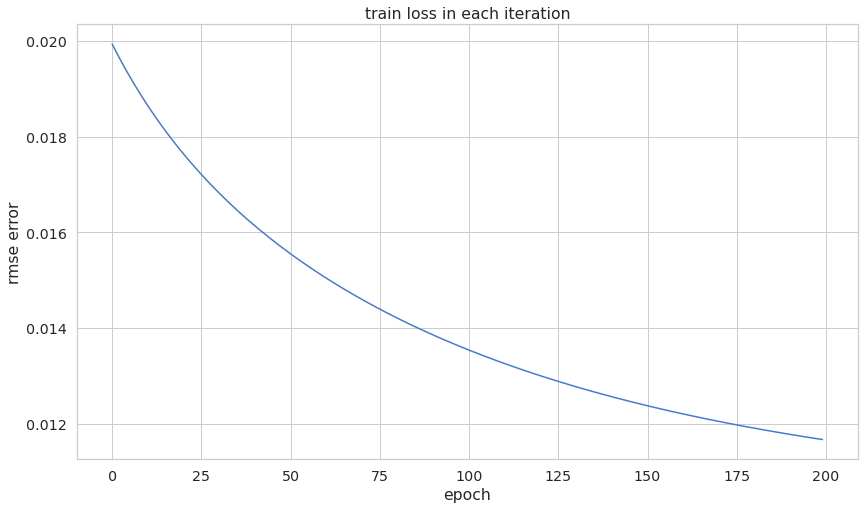

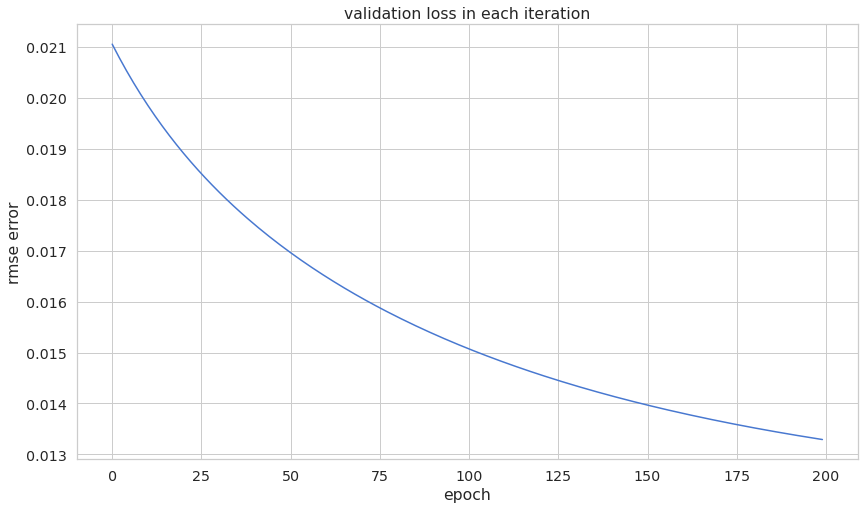

In [ ]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
plt.plot(recommender.train_loss)
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.title('train loss in each iteration')
plt.show()
plt.plot(recommender.valid_loss)
plt.title('validation loss in each iteration')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.show()

#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

100%|██████████| 200/200 [05:59<00:00,  1.80s/it]


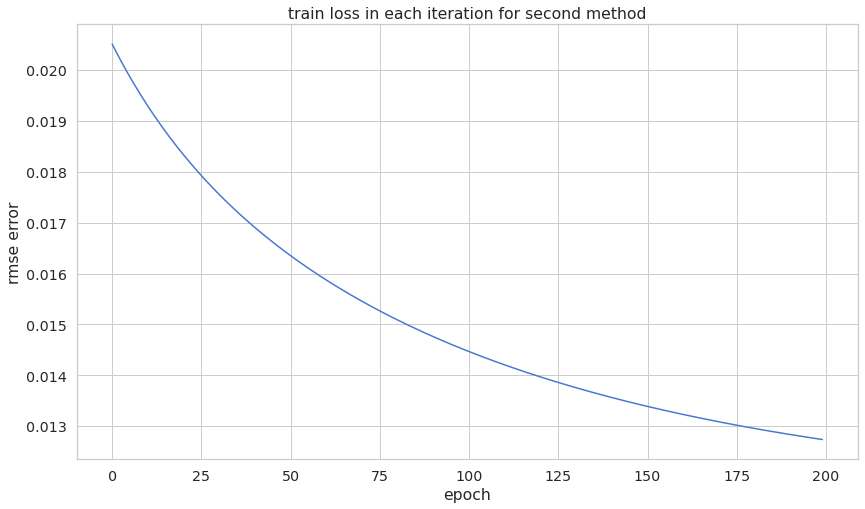

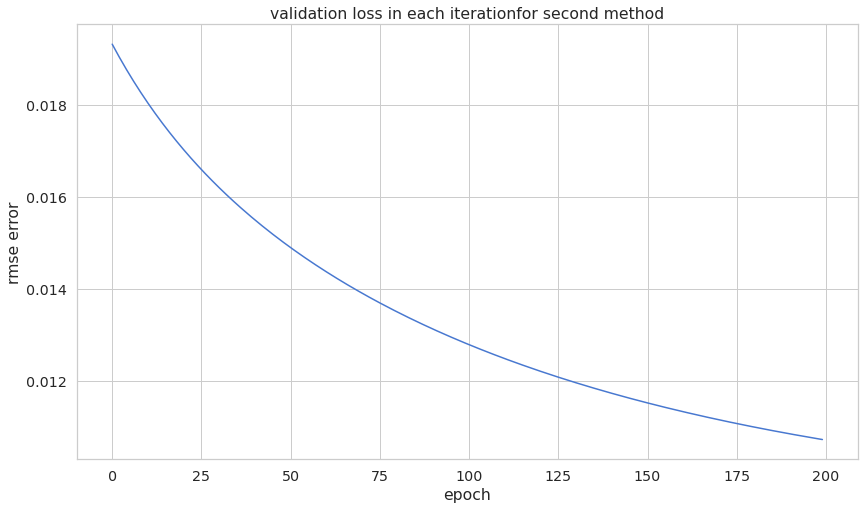

In [ ]:
# first method: not using all dataset! in first method if we didn't have more than 35 sample for each person we used for train but this method we define a min threshould even for training
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15


def train_test_split2(ratings):
    number_train_val = np.sum(tr>= 2)
    index_chosen = np.asarray(np.where(tr>= 2)).squeeze()
    _,m = np.shape(ratings)
    train,validation = np.zeros((number_train_val,m)),np.zeros((number_train_val,m))
    for i,index in enumerate(index_chosen):
      index_non_zero = np.asarray(np.where(ratings[index,:] > 0)).squeeze()
      np.random.shuffle(index_non_zero)
      if np.shape(index_non_zero)[0] >=MIN_USER_RATINGS:
        train[i,index_non_zero[DELETE_RATING_COUNT:]] = ratings[index,index_non_zero[DELETE_RATING_COUNT:]]
        validation[i,index_non_zero[0:DELETE_RATING_COUNT]] = ratings[index,index_non_zero[0:DELETE_RATING_COUNT]]
      else:
        train[i,:] = ratings[index,:]
    return train, validation
train2, val2 = train_test_split2(ratings)
recommender2 = Recommender().fit(train2, val2)
plt.plot(recommender2.train_loss)
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.title('train loss in each iteration for second method')
plt.show()
plt.plot(recommender2.valid_loss)
plt.title('validation loss in each iterationfor second method')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.show()



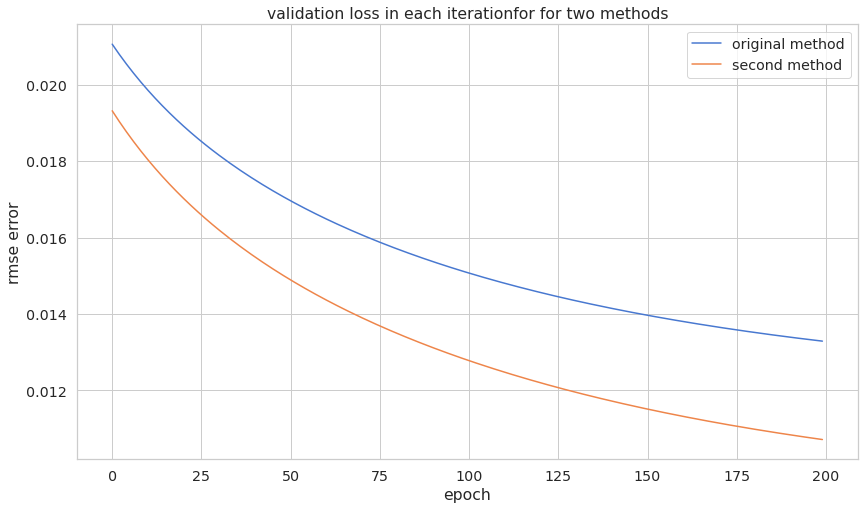

In [ ]:
# comparing result on same plot
plt.plot(recommender.valid_loss[:])
plt.plot(recommender2.valid_loss[:])
plt.title('validation loss in each iterationfor for two methods')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.legend(['original method','second method'])
plt.show()


as we can see, it's not a significant change but it is a positive change(for validation at least, this method seems to perform generally better(previous method have better train error)!
for third method we  estimate three different biases, overall bias, person bias and item vise bias and then we learn to learn changes from this mean to estimate final score

In [ ]:
from numpy.lib import ufunclike
from tqdm import tqdm # added this just for visualization when we train model
class Recommender_mean:
  # P is matrix representin artists and Q represent user, s
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q,u_p,u_q,u_all):
    #TODO : create the prediction matrix
    # P is matrix that represents artists and Q represent users, so here we create rating matrix by multiplying (Q^T)*P
    _,m= np.shape(Q)
    _,n = np.shape(P)
    predicted = np.matmul(Q.T,P) + np.repeat(np.reshape(u_q,(m,1)),n,axis = 1) + np.repeat(np.reshape(u_p,(1,n)),m,axis = 0) +u_all
    return predicted
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #initilization of Q and P
    m,n = np.shape(X_train)
    
    Q = np.random.normal(0, 0.1, size=(self.n_latent_features, m))
    P = np.random.normal(0, 0.1, size=(self.n_latent_features, n))
    #TODO : save the loss on train and validation data in each iteration
    train_loss = []
    valid_loss = []
    [row_train,col_train] = np.where(X_train>0)
    u_all = X_train[np.nonzero(X_train)].mean()
    X_train_new = X_train
    X_train_new[X_train>0] = X_train[X_train>0] - u_all
    u_q = np.asarray([np.mean(col[col!=0]) for col in X_train]).squeeze()
    u_p = np.asarray([np.mean(col[col!=0]) for col in X_train.T]).squeeze()
    u_q = np.nan_to_num(u_q)
    u_p = np.nan_to_num(u_p)
    iter_epcoh_num = len(row_train)
    for epoch_num in tqdm(range(self.n_epochs)):
      counter = 0
      for counter_indicator in range(iter_epcoh_num):
        i = row_train[counter_indicator]
        j = col_train[counter_indicator]
        counter = counter + 1
        
        
        e_ui = X_train_new[i,j] -u_q[i] - u_p[j]   - np.matmul(Q[:,i].T,P[:,j])
        Q[:,i] = Q[:,i] + self.learning_rate*(e_ui*P[:,j] - self.lmbda*Q[:,i])
        P[:,j] = P[:,j] + self.learning_rate*(e_ui*Q[:,i] - self.lmbda*P[:,j])
      
      train_loss_iter = rmse(self.predictions(P,Q,u_p,u_q,u_all),X_train)
      
      train_loss.append(train_loss_iter)
      valid_loss_iter = rmse(self.predictions(P,Q,u_p,u_q,u_all),X_val)
      
      valid_loss.append(valid_loss_iter)
      
    
    self.P = P
    self.Q = Q
    self.train_loss = train_loss
    self.valid_loss = valid_loss
    return self


      
   

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    
    out_temp = np.matmul(self.Q[:,user_index],self.P)
    out = out_temp[X_train[user_index,:] == 0]
    

    return out

In [ ]:
recommender3 = Recommender_mean().fit(train, val)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 200/200 [08:51<00:00,  2.66s/it]


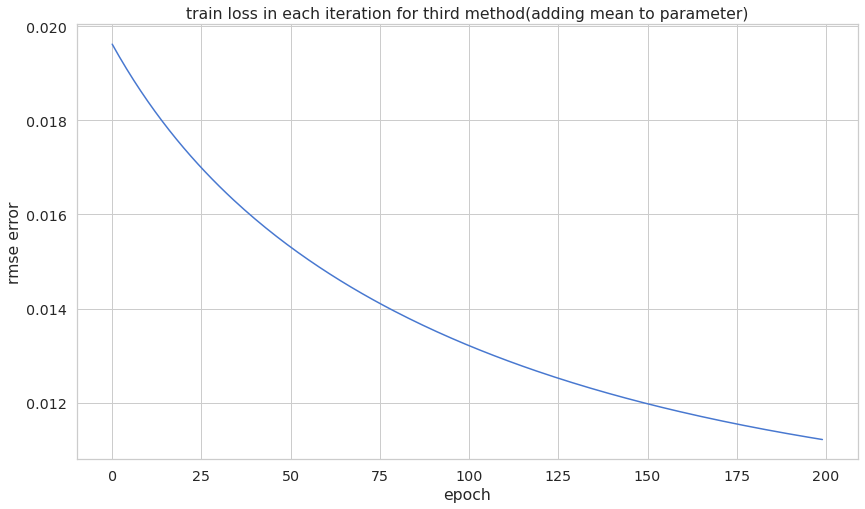

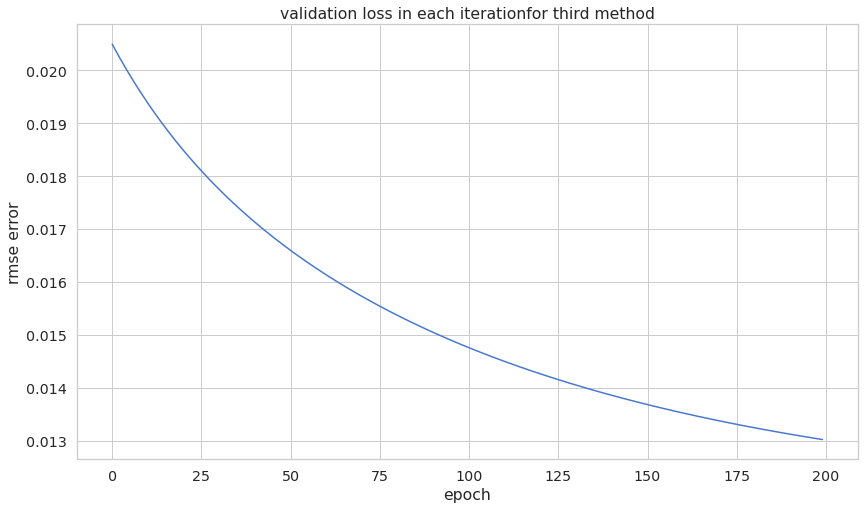

In [ ]:
plt.plot(recommender3.train_loss)
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.title('train loss in each iteration for third method(adding mean to parameter)')
plt.show()
plt.plot(recommender3.valid_loss)
plt.title('validation loss in each iterationfor third method')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.show()


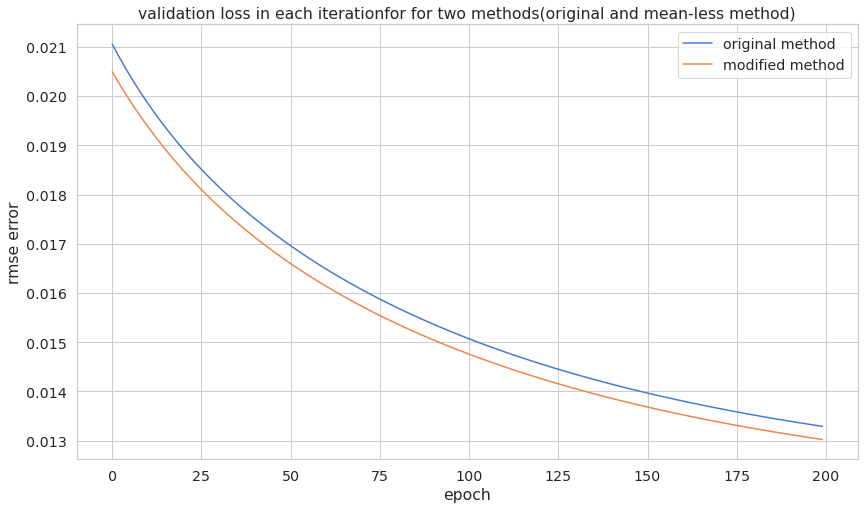

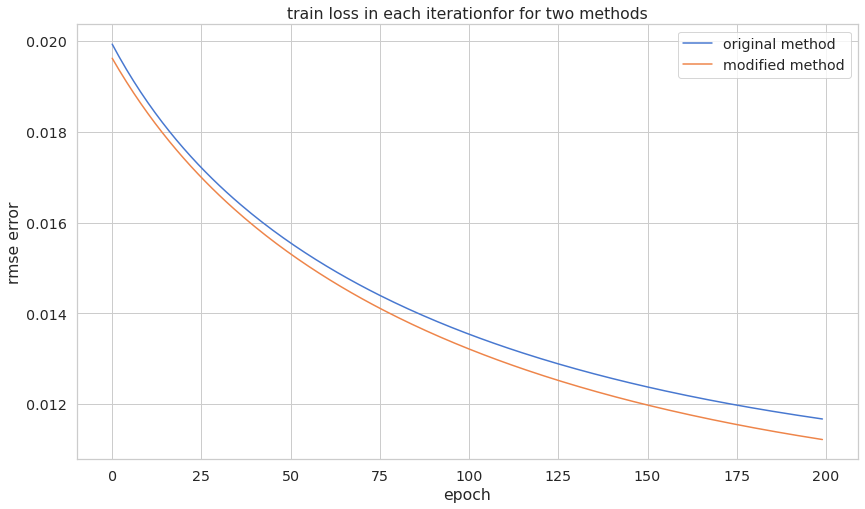

In [ ]:
# comparing
plt.plot(recommender.valid_loss)
plt.plot(recommender3.valid_loss)
plt.title('validation loss in each iterationfor for two methods(original and mean-less method)')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.legend(['original method','modified method'])
plt.show()


plt.plot(recommender.train_loss)
plt.plot(recommender3.train_loss)
plt.title('train loss in each iterationfor for two methods')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.legend(['original method','modified method'])

plt.show()


so adding biases improve results both for train and test

for fourth method, we use non negative matrix factorization with gradient decent algorithm to find it's parameters. we choose nmf because it seem it's more suitable for this case, when we create feature vectors for users and bands, we can say like one feture shows how hardcore (or something like that!) is that band and if the value becomes negeative, we comprehed that it is opposite of being hardcore, but we can assume that every category should be between 0 and +inf and state that you either have positive correlation with a feature or zero! so with that said we try our method and see how it works!

In [ ]:
from tqdm import tqdm # added this just for visualization when we train model
class nmf_Recommender:
  # P is matrix representin artists and Q represent user, s
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    # P is matrix that represents artists and Q represent users, so here we create rating matrix by multiplying (Q^T)*P
    predicted = np.matmul(Q.T,P)
    return predicted
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #initilization of Q and P
    m,n = np.shape(X_train)
    epsilon = 1e-5
    Q = np.abs(np.random.normal(0.0, 0.1, size=(self.n_latent_features, m)))
    P = np.abs(np.random.normal(0.0, 0.1, size=(self.n_latent_features, n)))
    #TODO : save the loss on train and validation data in each iteration
    train_loss = []
    valid_loss = []
    [row_train,col_train] = np.where(X_train>0)
    iter_epcoh_num = len(row_train)
    for epoch_num in tqdm(range(self.n_epochs)):
      counter = 0
      for counter_indicator in range(iter_epcoh_num):
        i = row_train[counter_indicator]
        j = col_train[counter_indicator]
        counter = counter + 1
        
        
        e_ui = X_train[i,j] - np.matmul(Q[:,i].T,P[:,j])
        temp_Q = Q[:,i] + self.learning_rate*(e_ui*P[:,j] - self.lmbda*Q[:,i])
        temp_Q[temp_Q<0] = epsilon
        Q[:,i] = temp_Q
        temp_P = P[:,j] + self.learning_rate*(e_ui*Q[:,i] - self.lmbda*P[:,j])
        temp_P[temp_P<0] = epsilon
        P[:,j] = temp_P
      #print(f"epoch {epoch_num+1} done!")
      train_loss_iter = rmse(self.predictions(P,Q),X_train)
      train_loss.append(train_loss_iter)
      valid_loss_iter = rmse(self.predictions(P,Q),X_val)
      valid_loss.append(valid_loss_iter)
      
    
    self.P = P
    self.Q = Q
    self.train_loss = train_loss
    self.valid_loss = valid_loss
    return self
  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    
    out_temp = np.matmul(self.Q[:,user_index],self.P)
    out = out_temp[X_train[user_index,:] == 0]
    

    return out


      
   



In [ ]:
recommender4 = nmf_Recommender(n_latent_features = 3,n_epochs = 600,learning_rate = 0.01).fit(train2, val2)

100%|██████████| 600/600 [08:02<00:00,  1.24it/s]


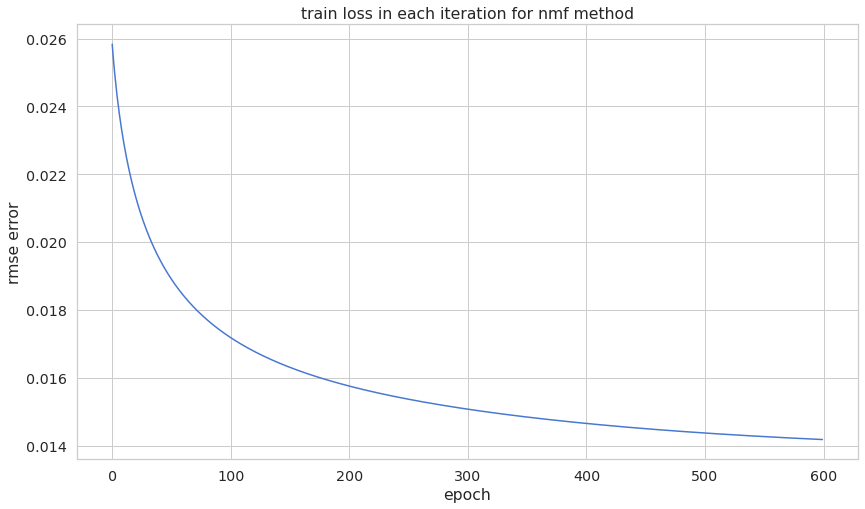

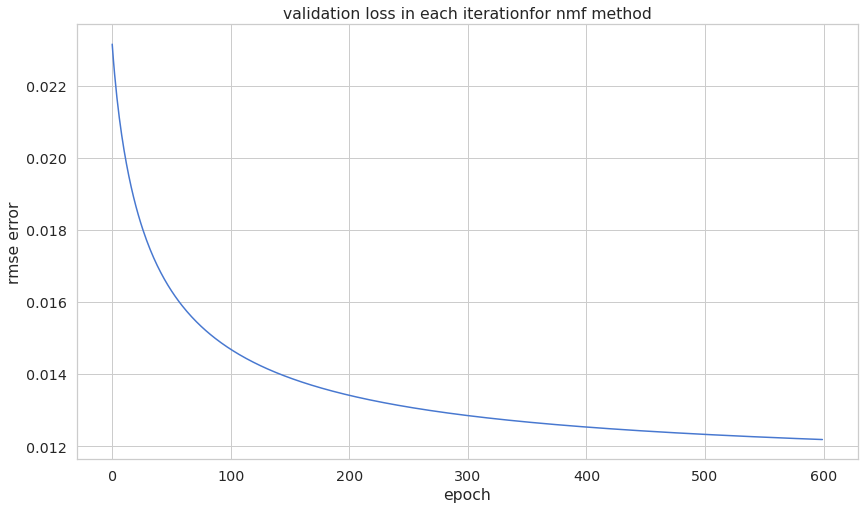

In [ ]:
plt.plot(recommender4.train_loss)
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.title('train loss in each iteration for nmf method')
plt.show()
plt.plot(recommender4.valid_loss)
plt.title('validation loss in each iterationfor nmf method')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.show()


it seems that it converge slower and result is not as good as meanless method we proposed, so best result is achived by creating train and validation and best method is calculating means(u,u_p,u_q) and learn distance between meanless values(all done in third method)
but all of method have a major issue, the thing we want to learn is so small that if we reduce number of features, norm of initiated matrix,... always result better answere! for example we define new recomender with new parameters like below:

In [ ]:
from tqdm import tqdm # added this just for visualization when we train model
class Recommender_2:
  # P is matrix representin artists and Q represent user, s
  
  def __init__(self, n_epochs=600, n_latent_features=3, lmbda=0.1, learning_rate=0.01):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    # P is matrix that represents artists and Q represent users, so here we create rating matrix by multiplying (Q^T)*P
    predicted = np.matmul(Q.T,P)
    return predicted
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #initilization of Q and P
    m,n = np.shape(X_train)
    
    Q = np.random.normal(0.0, 0.01, size=(self.n_latent_features, m))
    P = np.random.normal(0.0, 0.01, size=(self.n_latent_features, n))
    #TODO : save the loss on train and validation data in each iteration
    train_loss = []
    valid_loss = []
    [row_train,col_train] = np.where(X_train>0)
    iter_epcoh_num = len(row_train)
    for epoch_num in tqdm(range(self.n_epochs)):
      counter = 0
      for counter_indicator in range(iter_epcoh_num):
        i = row_train[counter_indicator]
        j = col_train[counter_indicator]
        counter = counter + 1
        
        
        e_ui = X_train[i,j] - np.matmul(Q[:,i].T,P[:,j])
        Q[:,i] = Q[:,i] + self.learning_rate*(e_ui*P[:,j] - self.lmbda*Q[:,i])
        P[:,j] = P[:,j] + self.learning_rate*(e_ui*Q[:,i] - self.lmbda*P[:,j])
      #print(f"epoch {epoch_num+1} done!")
      train_loss_iter = rmse(self.predictions(P,Q),X_train)
      train_loss.append(train_loss_iter)
      valid_loss_iter = rmse(self.predictions(P,Q),X_val)
      valid_loss.append(valid_loss_iter)
      
    
    self.P = P
    self.Q = Q
    self.train_loss = train_loss
    self.valid_loss = valid_loss
    return self


      
   

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    
    out_temp = np.matmul(self.Q[:,user_index],self.P)
    out = out_temp[X_train[user_index,:] == 0]
    

    return out

In [ ]:
recommender5 = Recommender_2().fit(train2, val2)

100%|██████████| 600/600 [07:29<00:00,  1.34it/s]


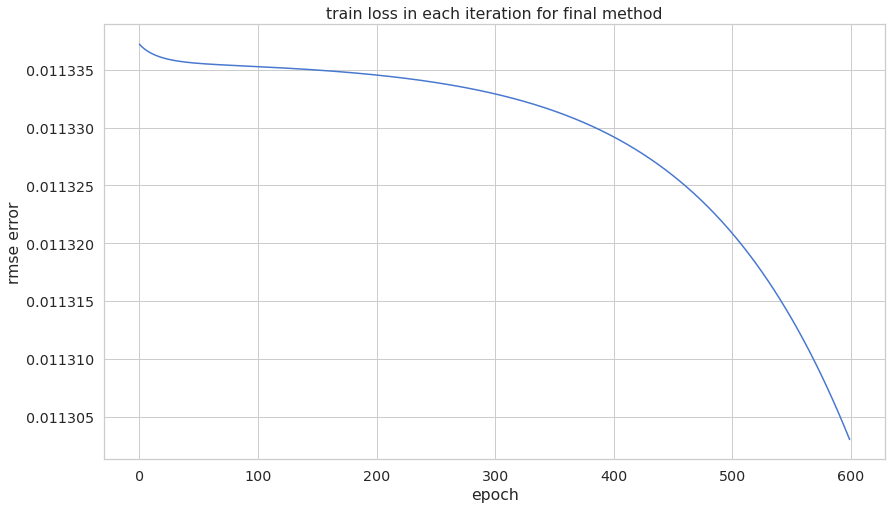

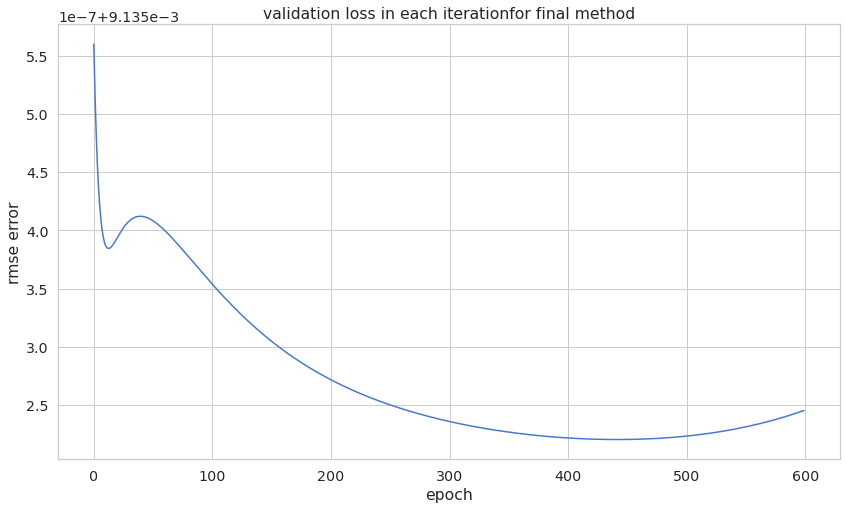

In [ ]:
plt.plot(recommender5.train_loss)
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.title('train loss in each iteration for final method')
plt.show()
plt.plot(recommender5.valid_loss)
plt.title('validation loss in each iterationfor final method')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.show()


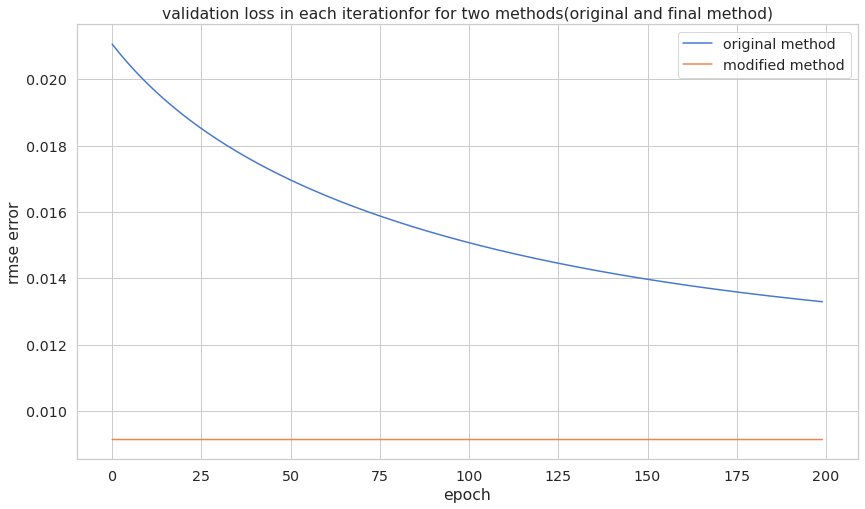

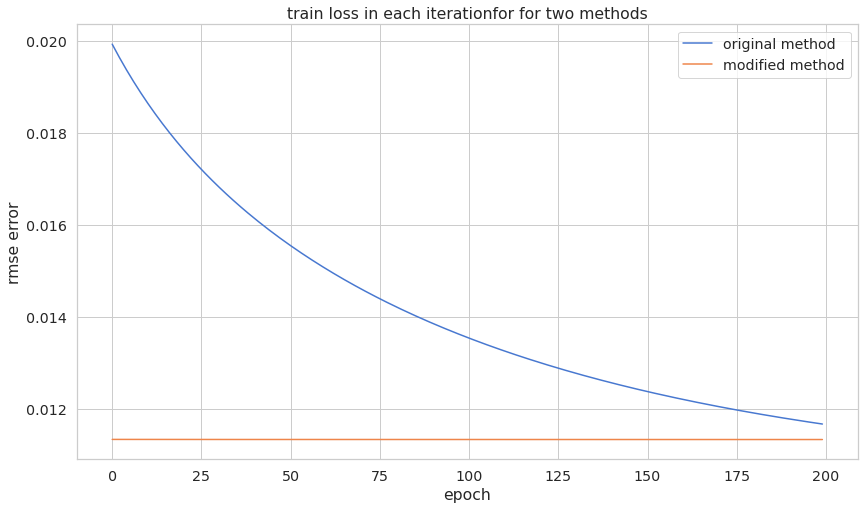

In [ ]:
# comparing
plt.plot(recommender.valid_loss)
plt.plot(recommender5.valid_loss[0:200])
plt.title('validation loss in each iterationfor for two methods(original and final method)')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.legend(['original method','modified method'])
plt.show()


plt.plot(recommender.train_loss)
plt.plot(recommender5.train_loss[0:200])
plt.title('train loss in each iterationfor for two methods')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.legend(['original method','modified method'])

plt.show()


but if we train our model for more epoches, even first and simplest model could converge to a really good answere(in all models we can see 200 epoches are not really enough to get to a point that convergance rate drop significantly and validation result is also always decressing so we can improve result by training in more epoches

In [ ]:
recommender_1000 = Recommender(n_epochs = 2000,learning_rate =0.01).fit(train2, val2)


100%|██████████| 2000/2000 [24:05<00:00,  1.38it/s]


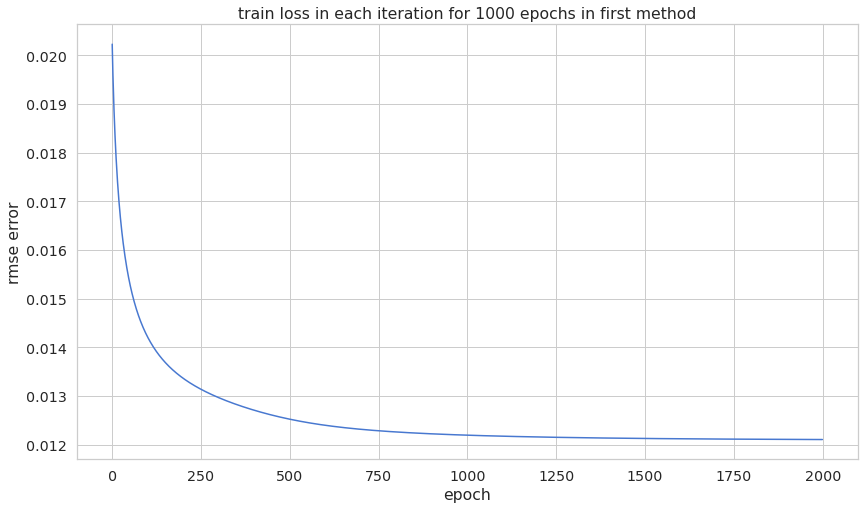

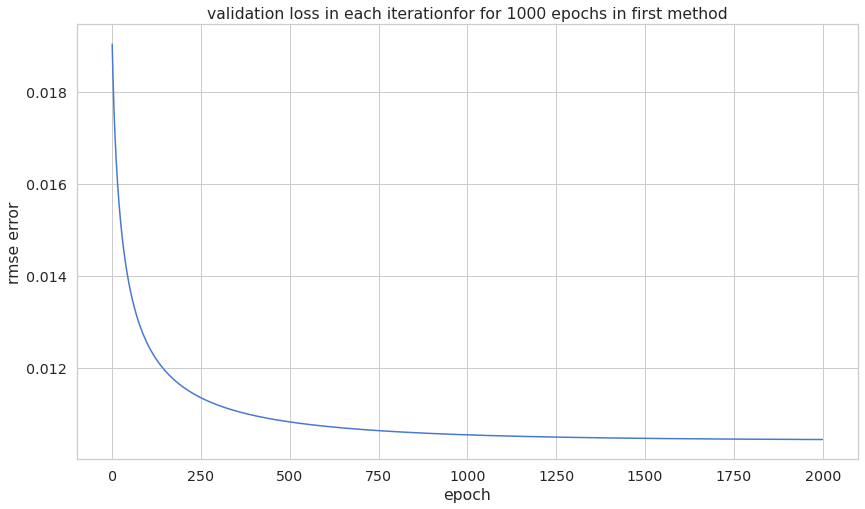

In [ ]:
plt.plot(recommender_1000.train_loss)
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.title('train loss in each iteration for 1000 epochs in first method')
plt.show()
plt.plot(recommender_1000.valid_loss)
plt.title('validation loss in each iterationfor for 1000 epochs in first method')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.show()


for our final proposed method, we just change algorithm for updating parameres. usually we updated p and q based on previously calculated error but in this method, after updating p, we calculate error again and then update q

In [ ]:
from tqdm import tqdm # added this just for visualization when we train model
class Recommender_double_step:
  # P is matrix representin artists and Q represent user, s
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    # P is matrix that represents artists and Q represent users, so here we create rating matrix by multiplying (Q^T)*P
    predicted = np.matmul(Q.T,P)
    return predicted
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #initilization of Q and P
    m,n = np.shape(X_train)
    
    Q = np.random.normal(0.0, 0.1, size=(self.n_latent_features, m))
    P = np.random.normal(0.0, 0.1, size=(self.n_latent_features, n))
    #TODO : save the loss on train and validation data in each iteration
    train_loss = []
    valid_loss = []
    [row_train,col_train] = np.where(X_train>0)
    iter_epcoh_num = len(row_train)
    for epoch_num in tqdm(range(self.n_epochs)):
      counter = 0
      for counter_indicator in range(iter_epcoh_num):
        i = row_train[counter_indicator]
        j = col_train[counter_indicator]
        counter = counter + 1
        
        
        e_ui = X_train[i,j] - np.matmul(Q[:,i].T,P[:,j])
        Q[:,i] = Q[:,i] + self.learning_rate*(e_ui*P[:,j] - self.lmbda*Q[:,i])
        e_ui = X_train[i,j] - np.matmul(Q[:,i].T,P[:,j])
        P[:,j] = P[:,j] + self.learning_rate*(e_ui*Q[:,i] - self.lmbda*P[:,j])
      #print(f"epoch {epoch_num+1} done!")
      train_loss_iter = rmse(self.predictions(P,Q),X_train)
      train_loss.append(train_loss_iter)
      valid_loss_iter = rmse(self.predictions(P,Q),X_val)
      valid_loss.append(valid_loss_iter)
      
    
    self.P = P
    self.Q = Q
    self.train_loss = train_loss
    self.valid_loss = valid_loss
    return self


      
   

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    
    out_temp = np.matmul(self.Q[:,user_index],self.P)
    out = out_temp[X_train[user_index,:] == 0]
    

    return out

In [ ]:
recommender_error_update = Recommender_double_step(n_epochs = 200).fit(train2, val2)


100%|██████████| 200/200 [02:50<00:00,  1.17it/s]


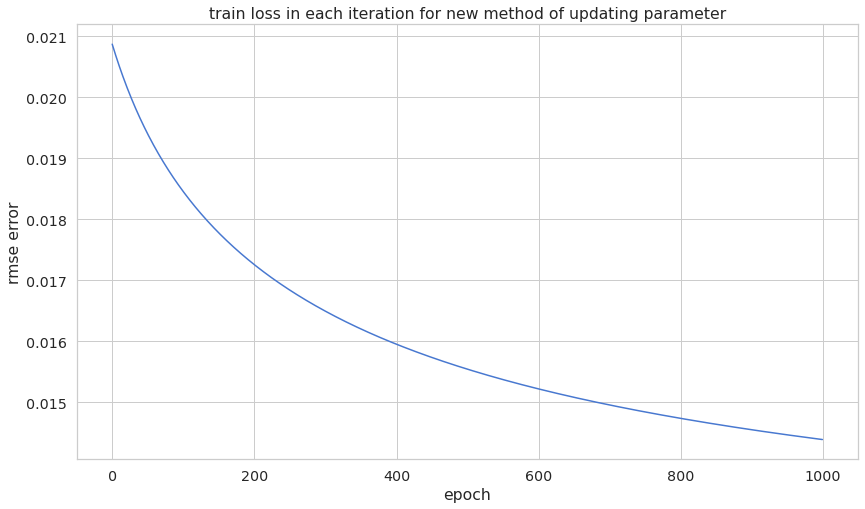

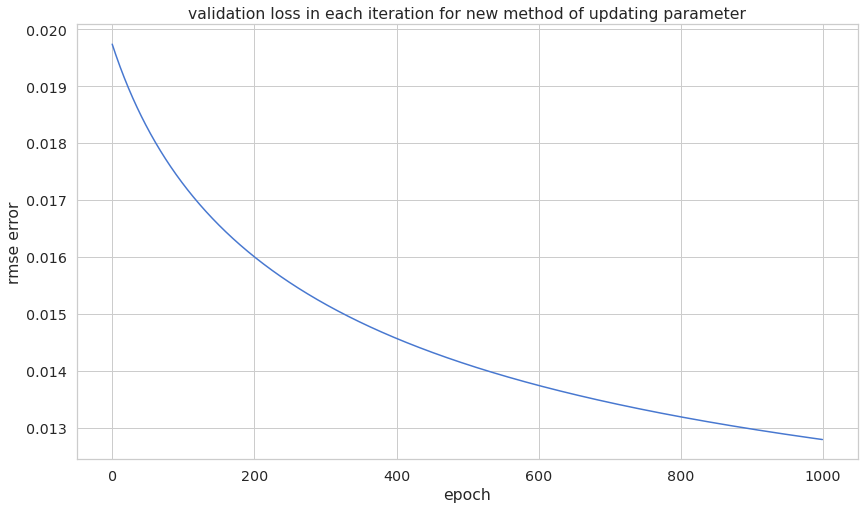

In [ ]:
plt.plot(recommender_error_update.train_loss)
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.title('train loss in each iteration for new method of updating parameter')
plt.show()
plt.plot(recommender_error_update.valid_loss)
plt.title('validation loss in each iteration for new method of updating parameter')
plt.xlabel('epoch')
plt.ylabel('rmse error')
plt.show()


result for this method is worse! so we don't compare it with first method.

# Making recommendations

In [ ]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]
rating_predictions = recommender_1000.predict(train, user_index) #using our best estimator
rating_predictions

array([-1.23540396e-04, -1.18337018e-06,  7.19729467e-04, ...,
       -5.66298989e-04, -3.11943253e-04, -3.09292774e-04])

In [ ]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame.from_dict(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [ ]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]
create_artist_ratings(artists, existing_ratings_index, existing_ratings)



,id,name,rating
0,7,Marilyn Manson,0.194361
1,475,Eminem,0.050609
2,614,Pearl Jam,0.041079
3,923,Children of Bodom,0.039891
4,978,Disturbed,0.027617
5,1118,A Perfect Circle,0.026906
6,1131,Tool,0.023532
7,2172,Gojira,0.019565
8,2479,Twiztid,0.019438
9,6257,Rob Zombie,0.014927


In [ ]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)


,id,name,rating
0,792,Thalía,0.001843
1,3266,The Ark,0.001725
2,3284,Daniel Ouellette,0.001715
3,3512,Coph Nia,0.001701
4,5483,Composition Of Sound,0.001659
5,11557,Showtek,0.001627
6,14598,Madcon,0.001609
7,15195,The Urgency,0.001599
8,16908,Psychopomps,0.001588
9,18369,Jordyn Shellhart,0.001540


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**

In [ ]:
#we train another model with bigger initial values so the result won't be as good but it will be more distinguishable
from tqdm import tqdm # added this just for visualization when we train model
class Recommender:
  # P is matrix representin artists and Q represent user, s
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    # P is matrix that represents artists and Q represent users, so here we create rating matrix by multiplying (Q^T)*P
    predicted = np.matmul(Q.T,P)
    return predicted
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #initilization of Q and P
    m,n = np.shape(X_train)
    
    Q = np.random.normal(0.0, 0.5, size=(self.n_latent_features, m))
    P = np.random.normal(0.0, 0.5, size=(self.n_latent_features, n))
    #TODO : save the loss on train and validation data in each iteration
    train_loss = []
    valid_loss = []
    [row_train,col_train] = np.where(X_train>0)
    iter_epcoh_num = len(row_train)
    for epoch_num in tqdm(range(self.n_epochs)):
      counter = 0
      for counter_indicator in range(iter_epcoh_num):
        i = row_train[counter_indicator]
        j = col_train[counter_indicator]
        counter = counter + 1
        
        
        e_ui = X_train[i,j] - np.matmul(Q[:,i].T,P[:,j])
        Q[:,i] = Q[:,i] + self.learning_rate*(e_ui*P[:,j] - self.lmbda*Q[:,i])
        P[:,j] = P[:,j] + self.learning_rate*(e_ui*Q[:,i] - self.lmbda*P[:,j])
      #print(f"epoch {epoch_num+1} done!")
      train_loss_iter = rmse(self.predictions(P,Q),X_train)
      train_loss.append(train_loss_iter)
      valid_loss_iter = rmse(self.predictions(P,Q),X_val)
      valid_loss.append(valid_loss_iter)
      
    
    self.P = P
    self.Q = Q
    self.train_loss = train_loss
    self.valid_loss = valid_loss
    return self


      
   

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    
    out_temp = np.matmul(self.Q[:,user_index],self.P)
    out = out_temp[X_train[user_index,:] == 0]
    

    return out

In [ ]:
recommender_plot = Recommender().fit(train,val)

100%|██████████| 200/200 [02:33<00:00,  1.30it/s]


In [ ]:
scores = np.sum(ratings,axis = 0)
xs = []
ys = []
zs = []
names = []
sorted_arg = np.argsort(scores*-1)
artist_ids = ratings_df.columns[:]
for i in range(10):
  names.append(ap['name'][np.where(np.asarray(ap['artistID']) == artist_ids[sorted_arg[i]])[0][0]])
  xs.append(recommender_plot.P[0,sorted_arg[i]])
  ys.append(recommender_plot.P[1,sorted_arg[i]])
  zs.append(recommender_plot.P[2,sorted_arg[i]])


In [ ]:
xs = np.asarray(xs)
ys = np.asarray(ys)
zs = np.asarray(zs)


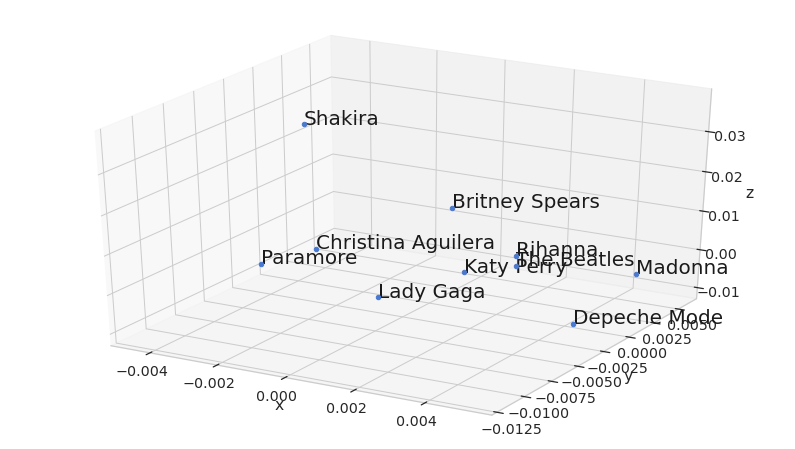

In [ ]:
from pylab import figure

fig = figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(xs)): #plot each point + it's index as text above
    ax.scatter(xs[i],ys[i],zs[i],color='b') 
    ax.text(xs[i],ys[i],zs[i],  '%s' % (names[i]), size=20, zorder=1,  
    color='k') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

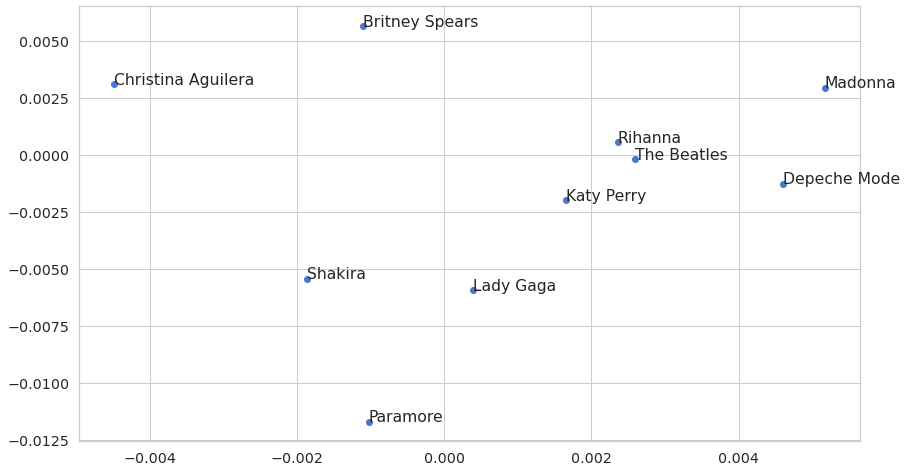

In [ ]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)

for i in range(len(xs)):
    ax.annotate(names[i], (xs[i], ys[i]))

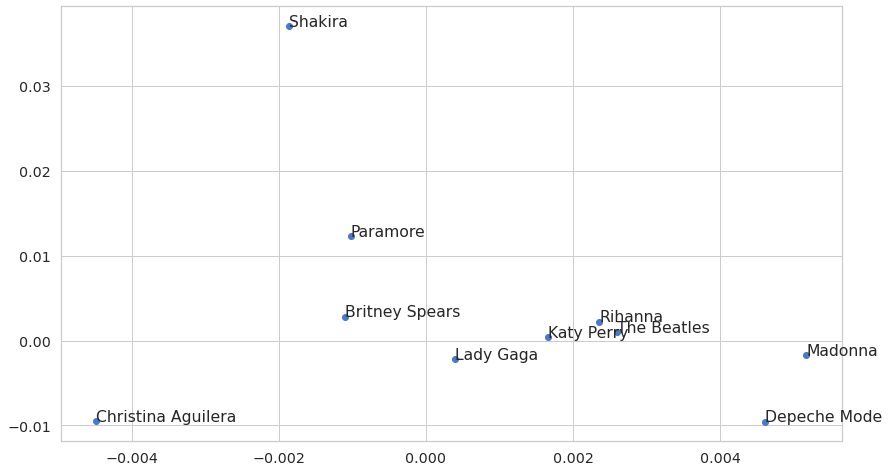

In [ ]:
fig, ax = plt.subplots()
ax.scatter(xs, zs)

for i in range(len(xs)):
    ax.annotate(names[i], (xs[i], zs[i]))

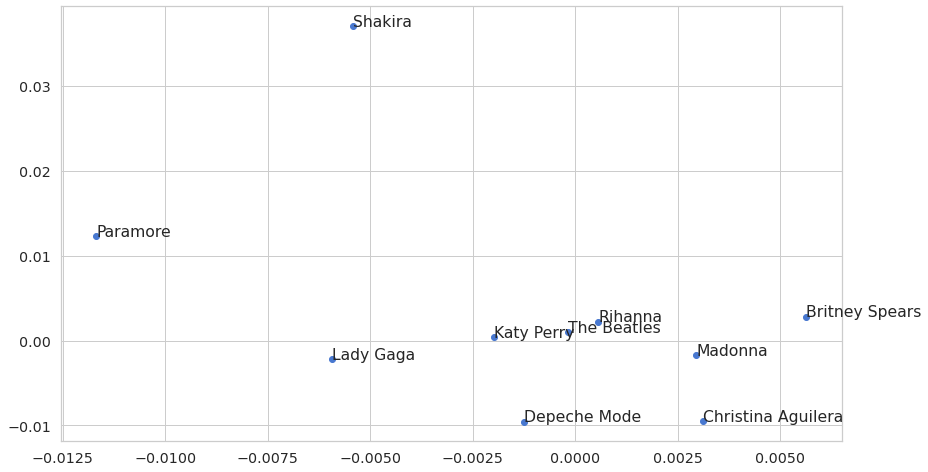

In [ ]:
fig, ax = plt.subplots()
ax.scatter(ys, zs)

for i in range(len(xs)):
    ax.annotate(names[i], (ys[i], zs[i]))

 we scatter plot user feature keys and britny spears  we expect so many points should have same direction(large correlation) with britny spears (or other well known singers)
 if you also pay more attention more well known artist are closer in comparison to other singers, so it is easier for customers feature vectors to have same direction for this popular artists which results in better score for them.

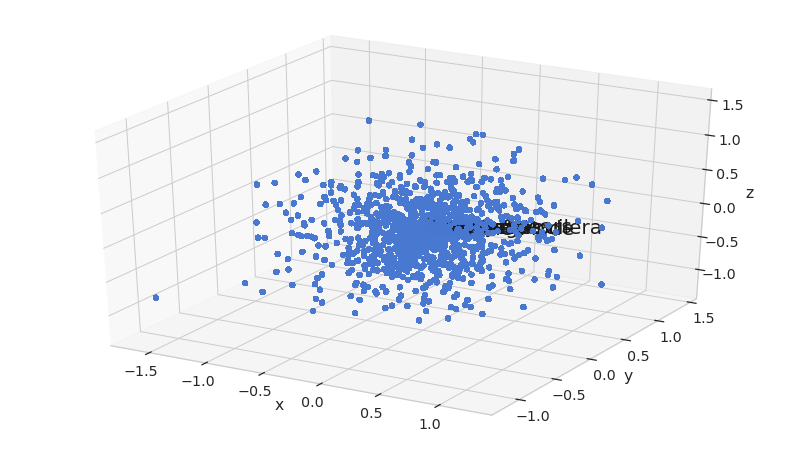

In [ ]:

fig = figure()
ax = fig.add_subplot(projection='3d')
xq = []
yq = []
zq = []  

for i in range(1000):
  xq.append(recommender_plot.Q[0,i])
  yq.append(recommender_plot.Q[1,i])
  zq.append(recommender_plot.Q[2,i])

for i in range(1000): #plot each point + it's index as text above
    
      
    ax.scatter(xq, yq,zq,color = 'b')
for i in range(10):
  ax.scatter(xs[i],ys[i],zs[i],color='y') 
  ax.text(xs[i],ys[i],zs[i],  '%s' % (names[i]), size=20, zorder=1,  color='k') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()



as we expected, large portion of customer feature daya have aligment close to top singers feature vector and few of them are far off, and that's because probably we didn't have enough data for them on this singers so they didn't learn or maybe they really didn't like these popular singers!

In [ ]:
# we also use pca to reduce feature numbers to 2 so it is easier to interpret
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(recommender_plot.Q.T)
data_pca = pca.transform(recommender_plot.Q.T)
data_pca = data_pca.T
artist_stacked = np.vstack((xs[0:10],ys[0:10],zs[0:10]))
data_artist_pca = pca.transform(artist_stacked.T)
data_artist_pca = data_artist_pca.T

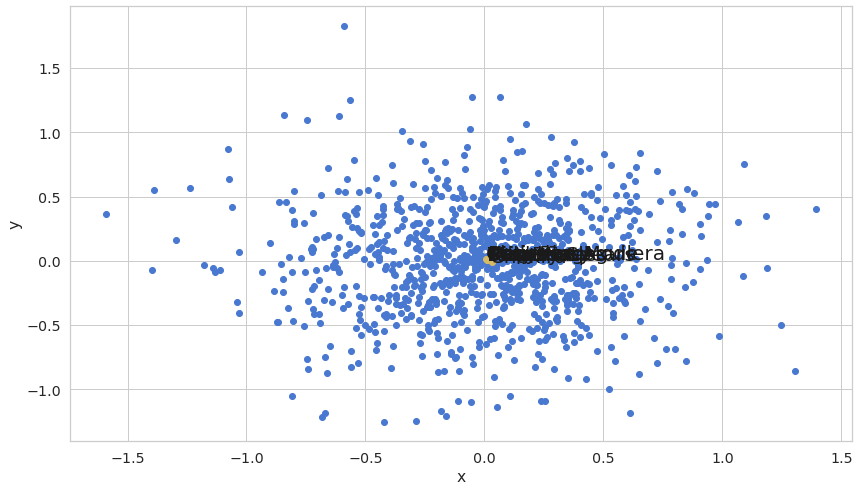

In [ ]:

fig = figure()
ax = fig.add_subplot()


for i in range(1000): #plot each point + it's index as text above
    
      
    ax.scatter(data_pca[0,i], data_pca[1,i],color = 'b')
for i in range(10):
  ax.scatter(data_artist_pca[0,i],data_artist_pca[1,i],color='y') 
  ax.text(data_artist_pca[0,i],data_artist_pca[1,i],  '%s' % (names[i]), size=20, zorder=1,  color='k') 
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()



we can see most of them are around popular artists and it's expected.